In [1]:
#basic package
import json
import tqdm
import os
import numpy as np
import glob
import pandas as pd
import sys
import shutil
import time
import datetime as dt
import itertools
import time
import re
from collections import Counter
from collections import defaultdict
import operator
import math
import functools
import collections
import datetime as dt

#plot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_ = os.path.join(r'D:\vm_exchange\PhD_Data\Productivity')

## Download data

In [3]:
df_feed = pd.read_csv(os.path.join(path_,'Futter_CM_summary.csv'), sep=';')
df_feed['date'] = df_feed['date'].map(lambda x: dt.datetime.strptime(x, "%d.%m.%Y")) #, parse_dates=['date']: wrong
print(df_feed.shape)
df_feed.head(3)

(330, 21)


,date,Abt1,Abt2,Abt3,Abt4,Abt5,Abt6,Abt7,Abt8,Abt9,...,Abt11,Abt12,Abt13,Abt14,Abt15,Abt16,Abt17,Abt18,Abt19,Abt20
0,2019-10-09,17,"16,8","9,7","16,7","17,4","17,2","9,8","10,1","17,1",...,"9,8","17,3",7,"10,1","7,3",17,7,"9,8","16,8",7
1,2019-10-10,"17,2","17,5","6,8","7,1",7,17,"23,6","24,4","16,9",...,"14,2","16,9","26,7","24,1","16,9","16,8","16,8","27,2","16,8",17
2,2019-10-11,10,"16,8","24,3","17,1","17,2","16,8","6,8","7,1","16,9",...,"17,3","16,9","17,1","16,9",17,"17,4","17,5",17,17,"17,3"


In [4]:
df_moon = pd.read_csv(os.path.join(path_,'MoonPhase.csv'), sep=';')
df_moon['date'] = df_moon['date'].map(lambda x: dt.datetime.strptime(x, "%d.%m.%Y")) #, parse_dates=['date']: wrong
print(df_moon.shape)
df_moon.head(3)

(95, 4)


,lunar phase,date_init,date,time
0,New Moon,"January 6, Sun",2019-01-06,02:29
1,First Quarter,"January 14, Mon",2019-01-14,07:46
2,Full Moon,"January 21, Mon",2019-01-21,06:17


In [5]:
df_egg = pd.read_csv(os.path.join(path_,'egg_summary.csv'), sep=';', parse_dates=['Datum'])
df_egg.rename(columns={'Datum':'date'}, inplace=True)
print(df_egg.shape)
df_egg.head(3)

(6160, 19)


,date,Vers.-Tag,Ab-gänge,Kanni-balis.,spez. Veränderung,Anfangs-Bestand,Tier-bestand,ver-legt,Nest-eier,Total,Scha-len,Unnamed: 11,Unnamed: 12,LayingPhase,Pen,#eggPerTier,#eggOutsideBoxPerTier,DOA,WOA
0,2019-10-31,1,NaN,NaN,NaN,NaN,225,7.0,153,160,NaN,NaN,NaN,1_4_E219,1,0.680000,0.031111,114,17
1,2019-11-01,2,NaN,NaN,NaN,NaN,225,6.0,148,154,NaN,NaN,NaN,1_4_E219,1,0.657778,0.026667,115,17
2,2019-11-02,3,NaN,NaN,NaN,NaN,225,8.0,144,153,1.0,NaN,NaN,1_4_E219,1,0.640000,0.035556,116,17


## Plot

#### egg

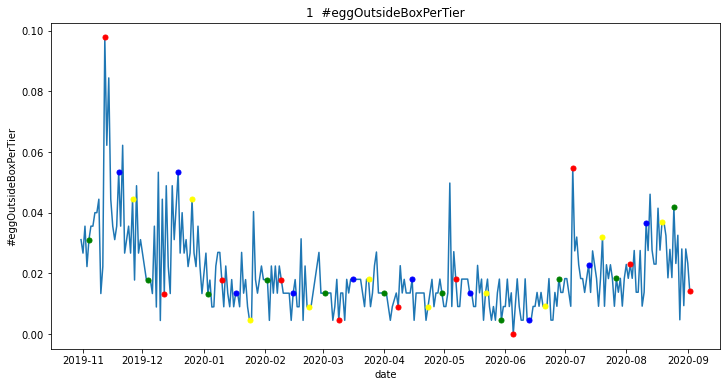

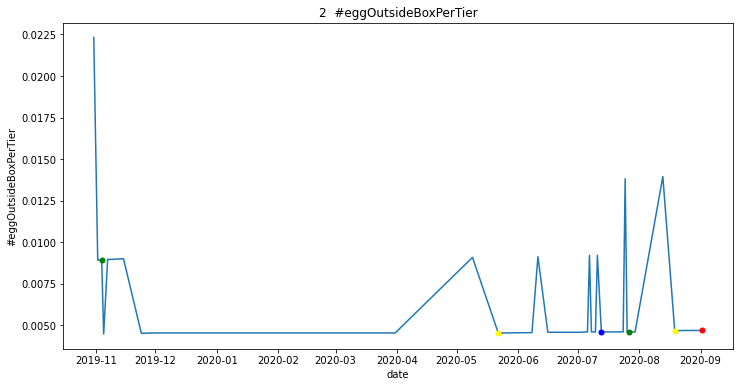

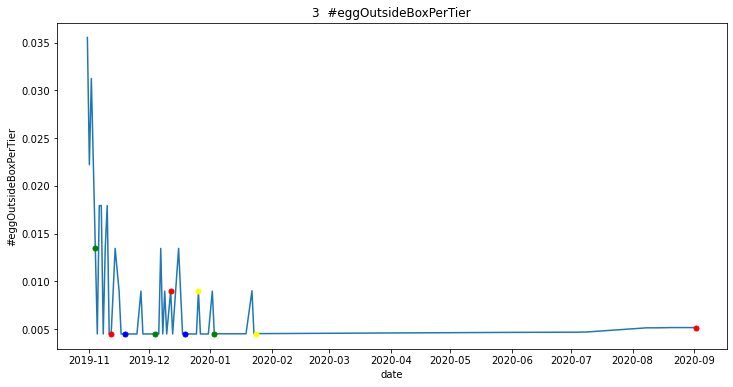

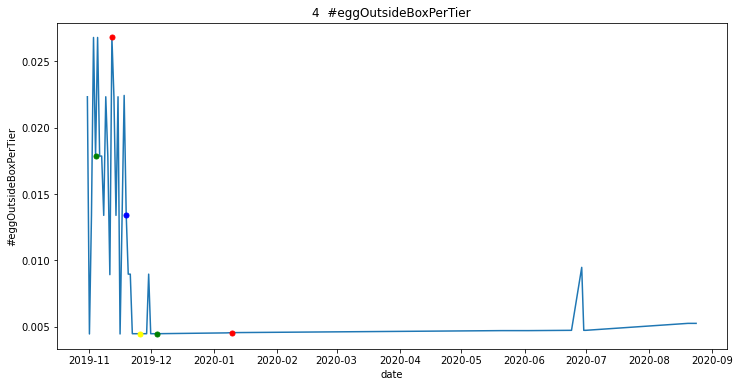

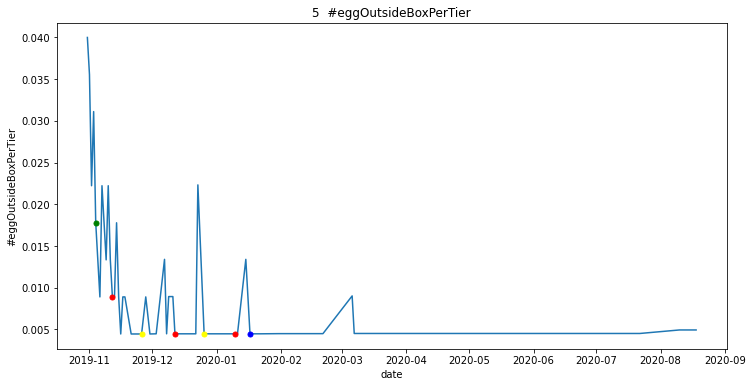

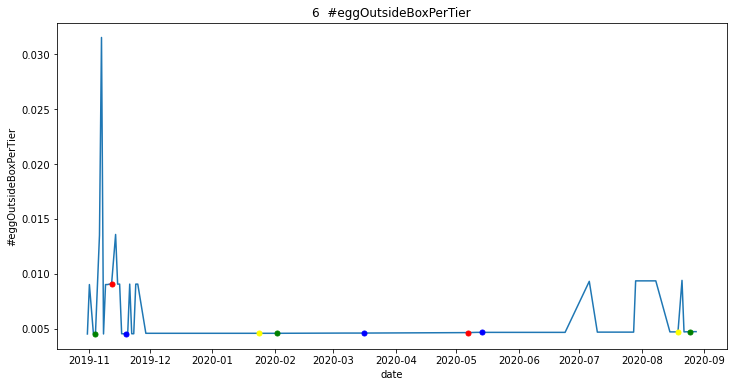

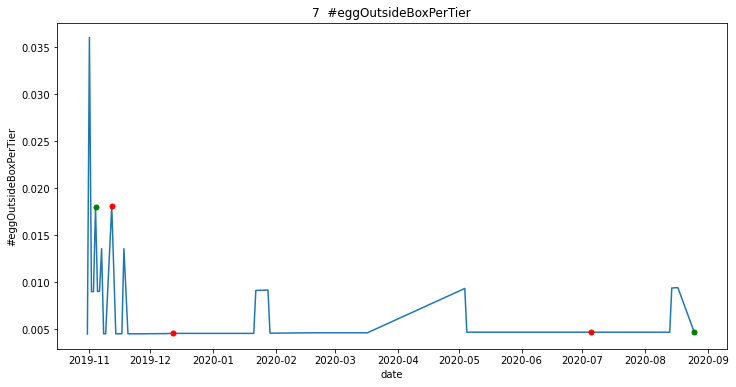

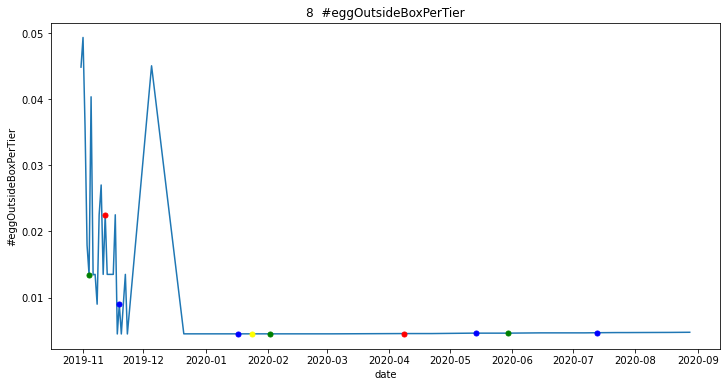

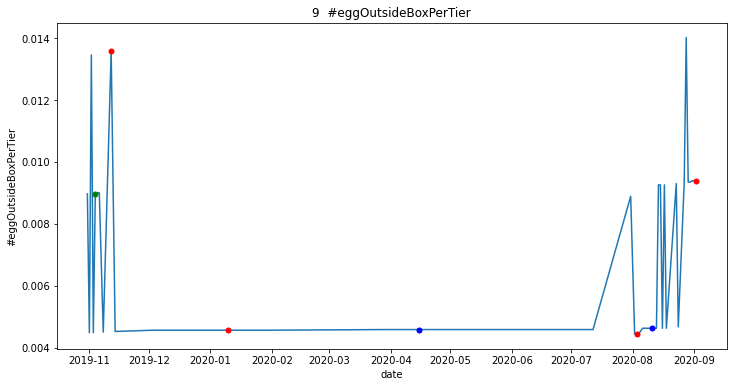

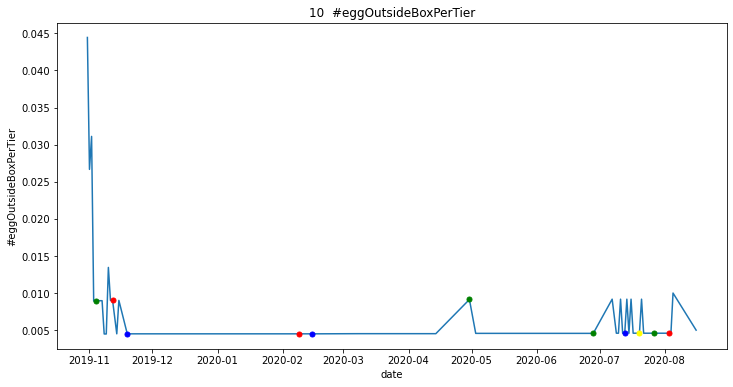

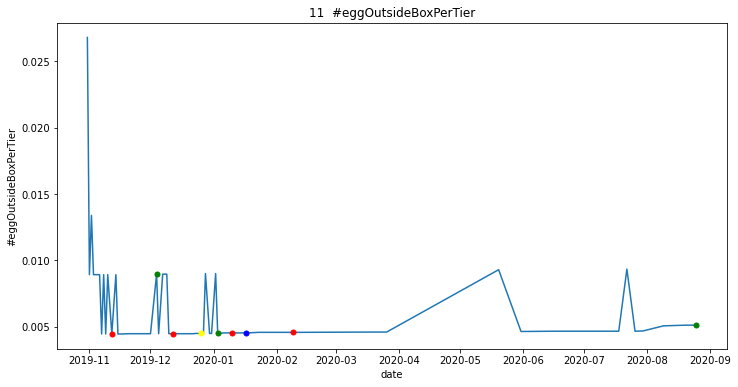

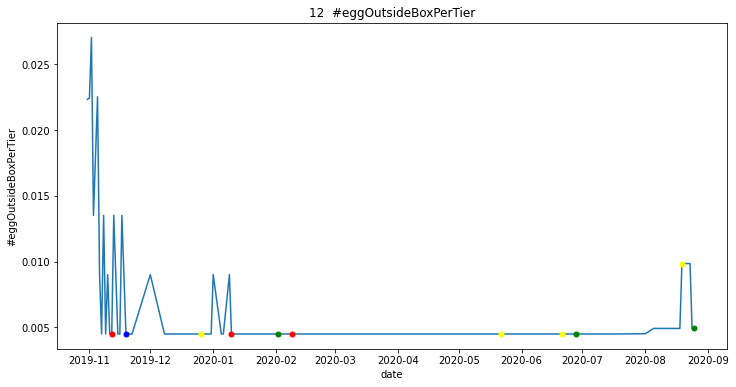

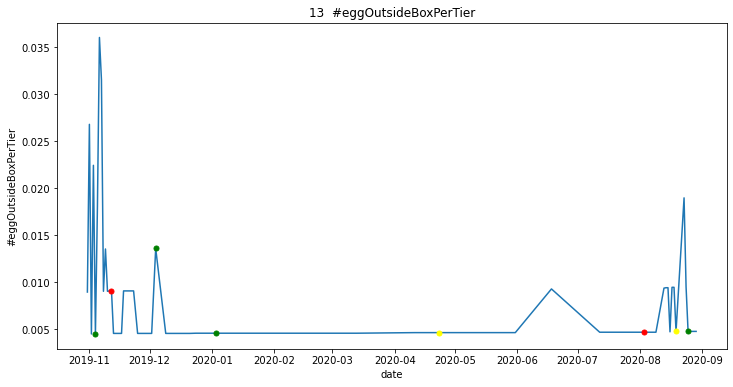

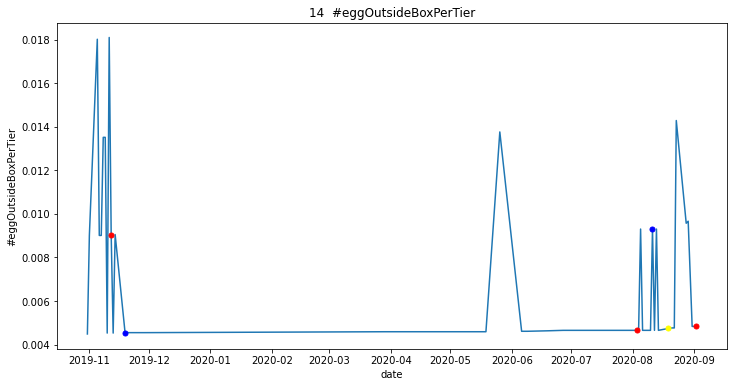

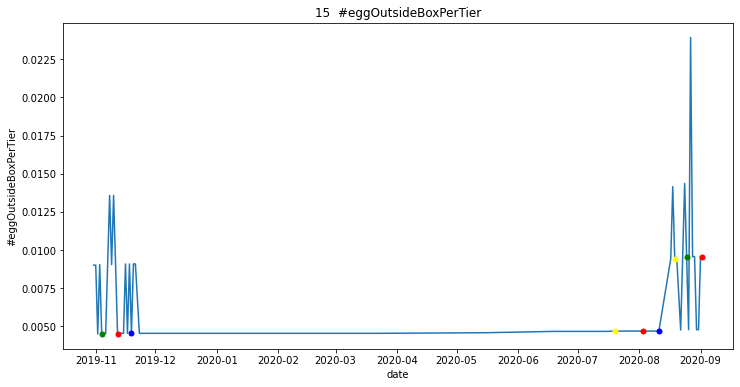

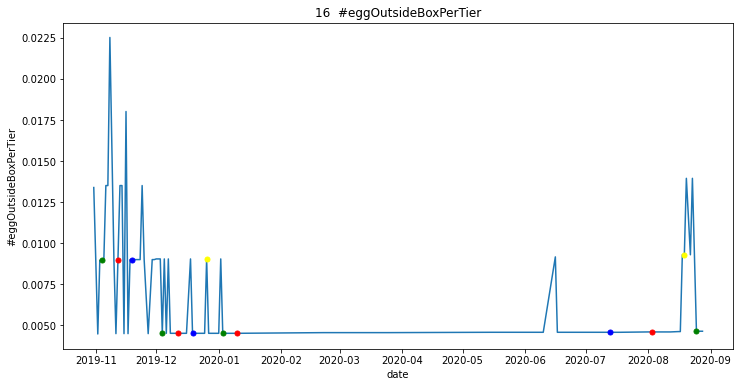

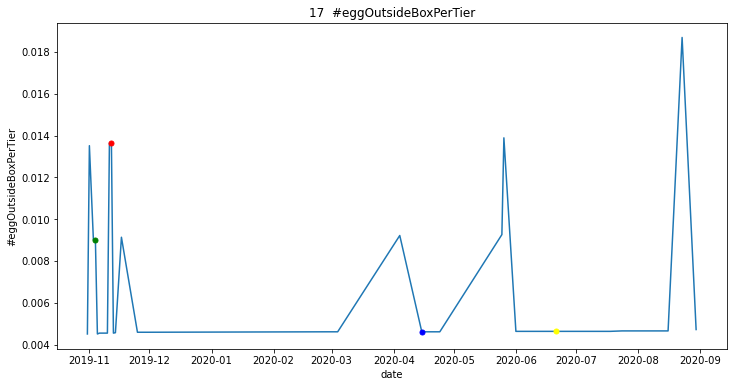

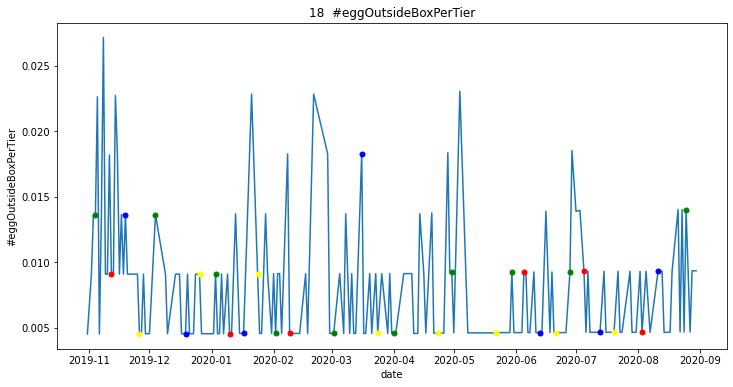

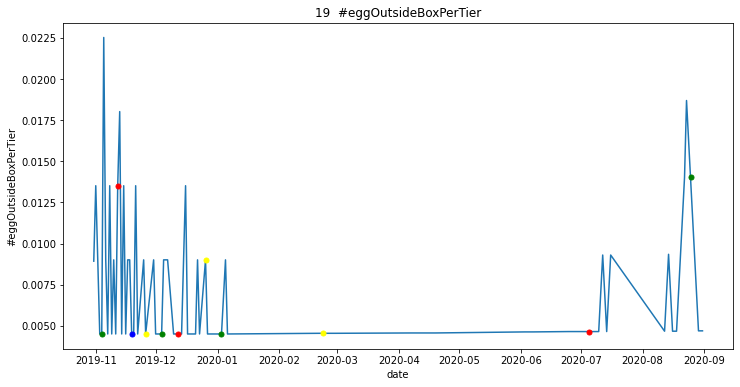

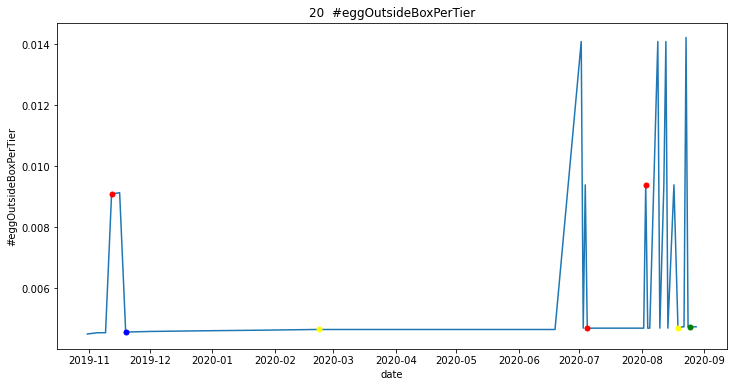

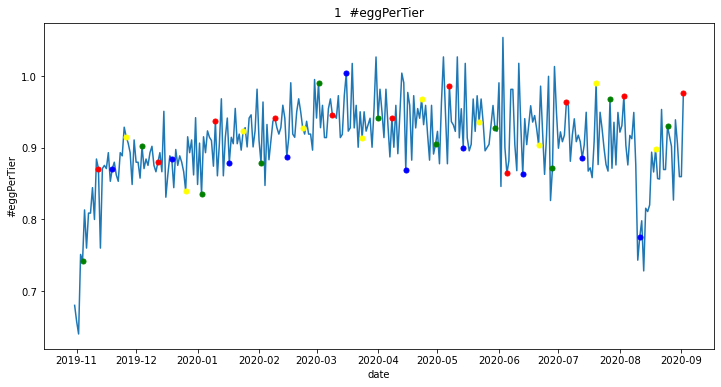

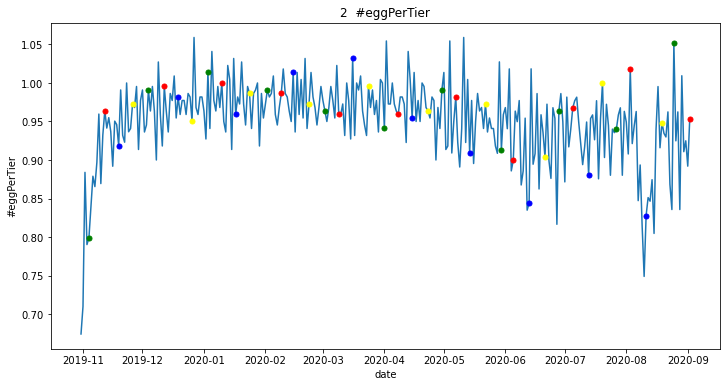

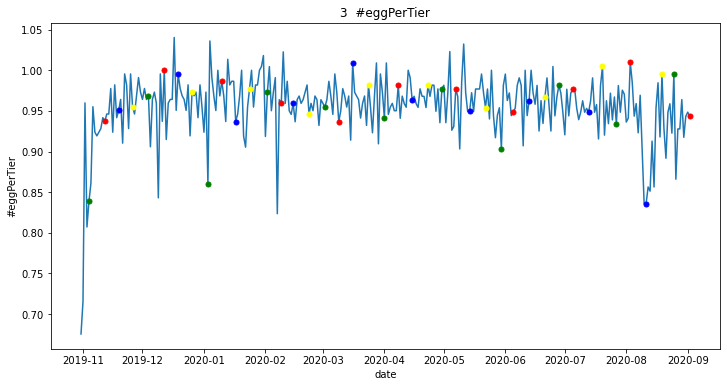

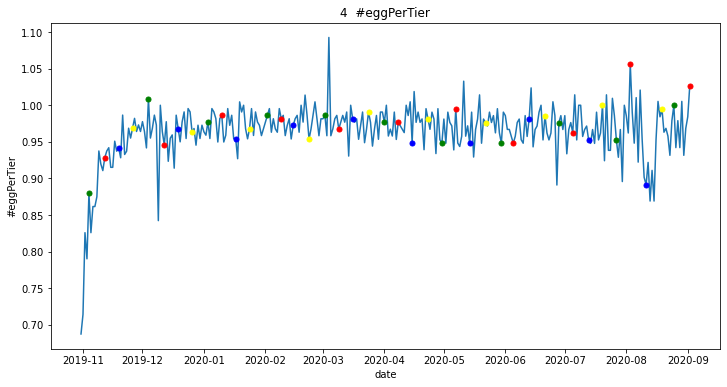

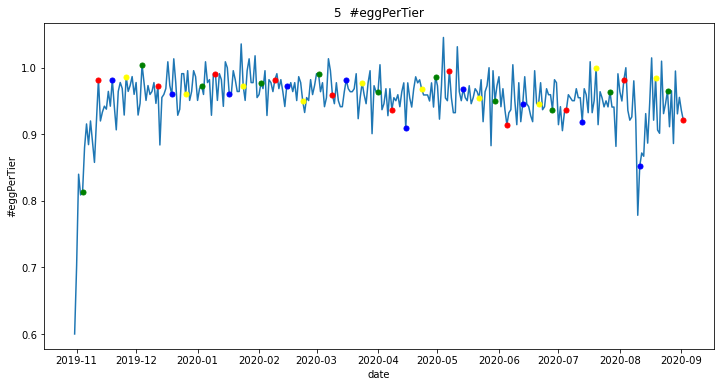

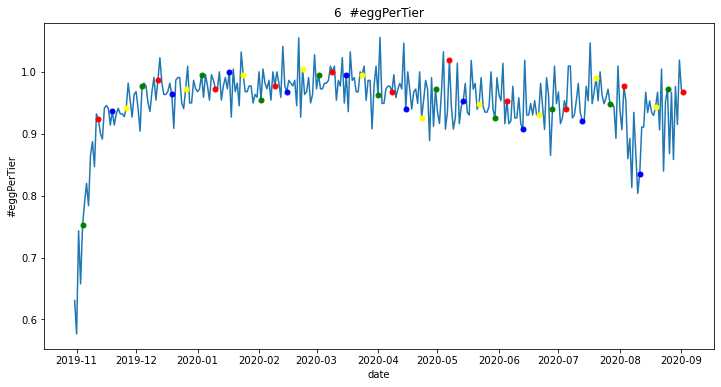

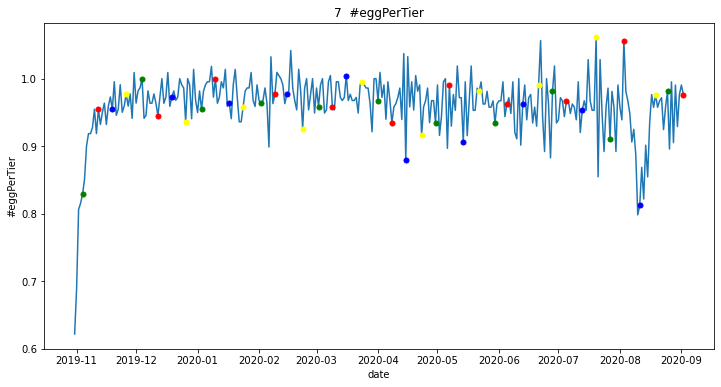

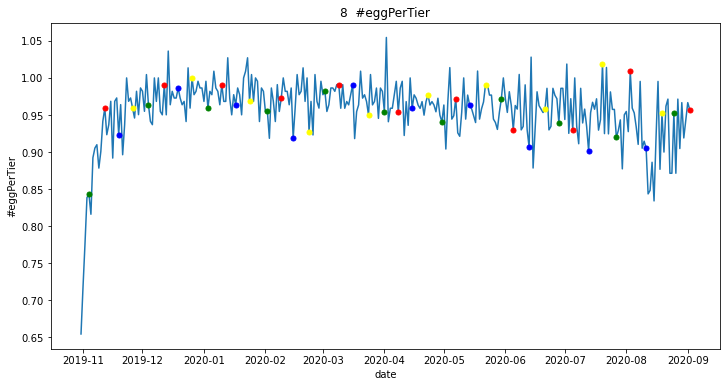

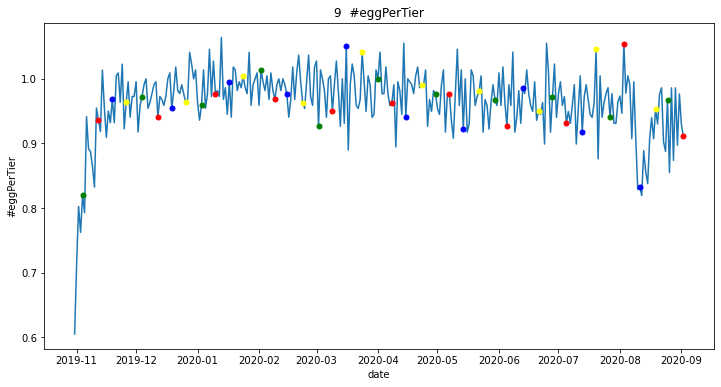

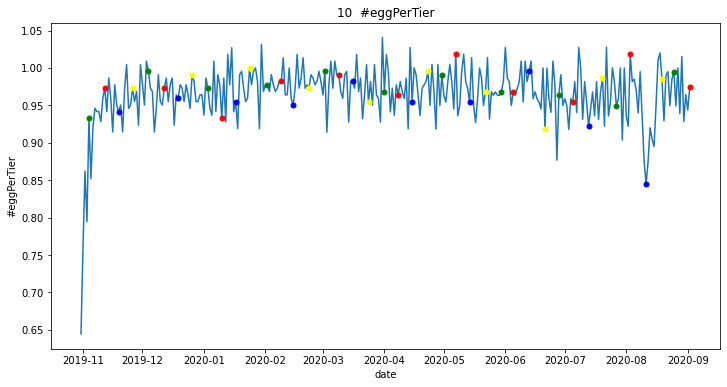

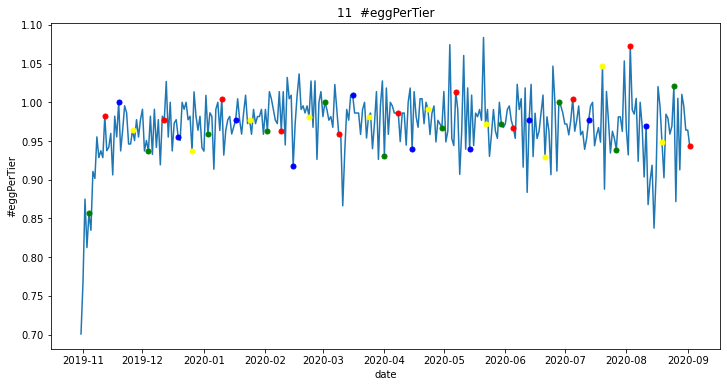

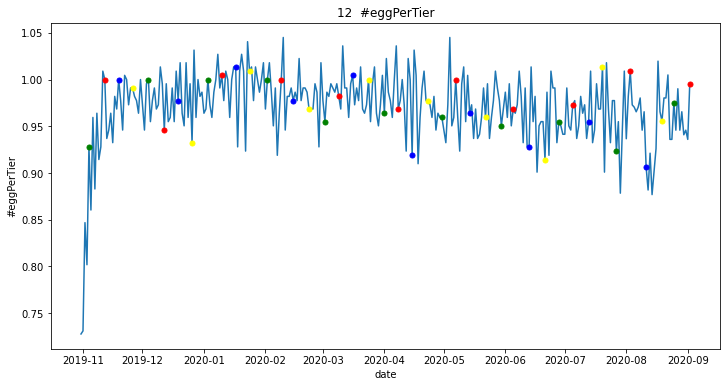

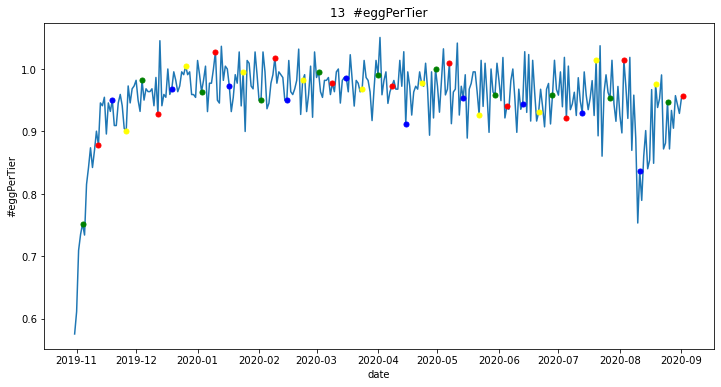

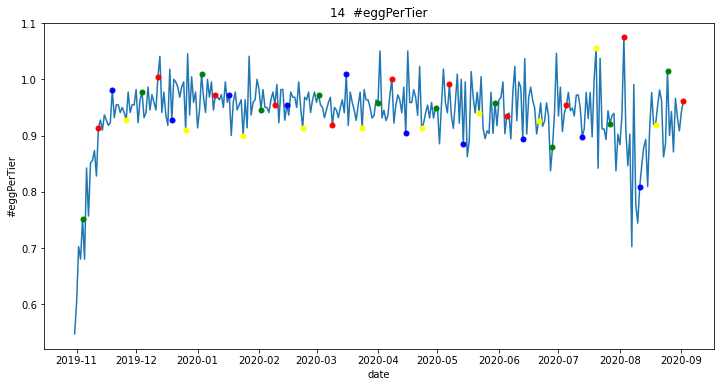

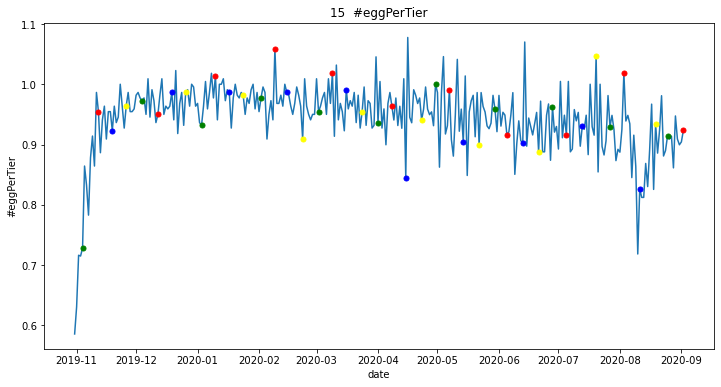

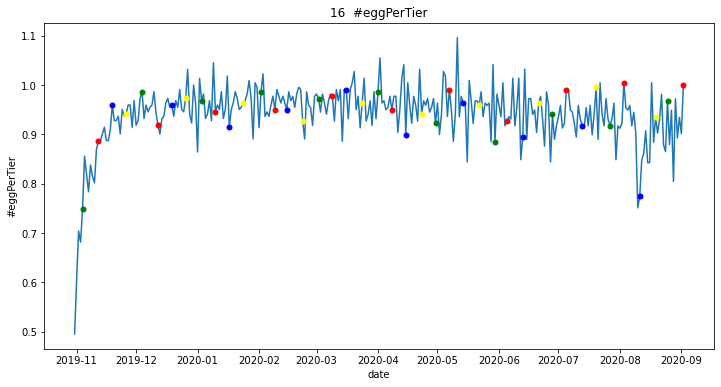

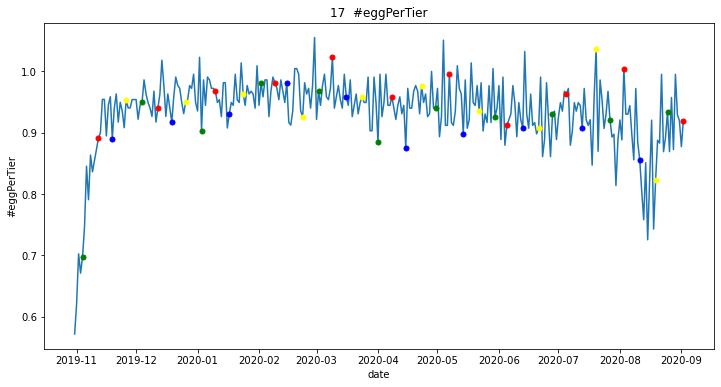

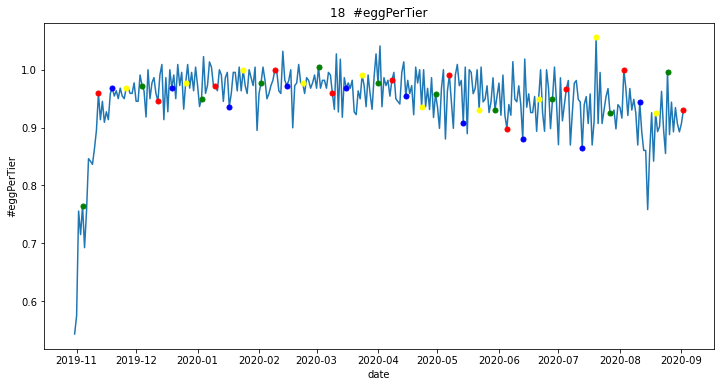

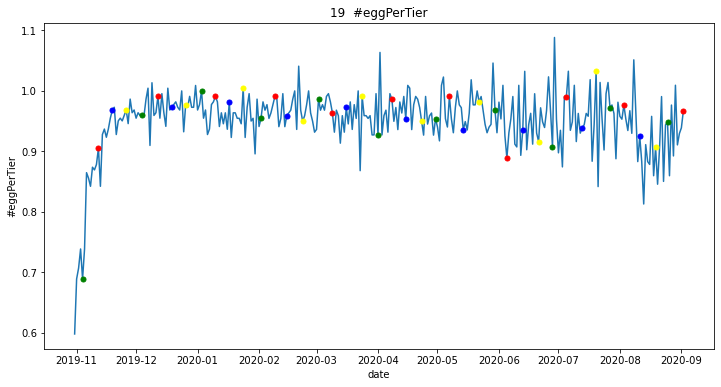

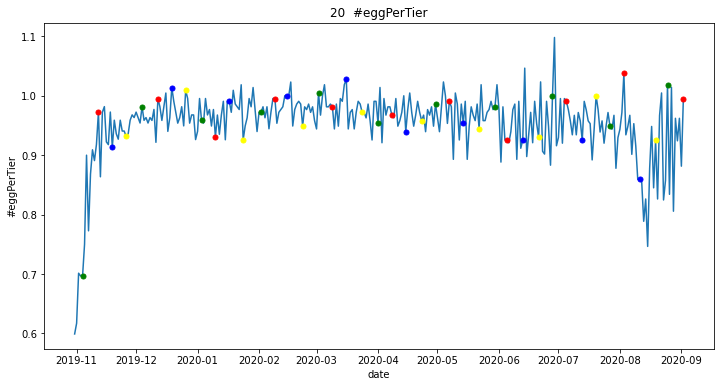

In [6]:
for v in ['#eggOutsideBoxPerTier','#eggPerTier']:
    df_egg[v] = df_egg[v].astype(float)
    for Pen in df_egg['Pen'].unique():
        plt.figure(figsize=(12,6))
        ax = plt.plot()
        df_plt = df_egg[df_egg['Pen']==Pen]
        sns.lineplot(x="date", y=v, data=df_plt);
        dico_color = {'Full Moon':'r', 'Last Quarter':'blue', 'New Moon':'yellow', 'First Quarter':'green'}
        for l in df_moon['lunar phase'].unique():
            for d in df_moon[df_moon['lunar phase']==l]['date'].tolist():
                if d in df_egg['date'].unique():
                    plt.plot(d, df_plt[df_plt['date']==d][v].values[0],
                             color=dico_color[l],marker=".", markersize=10)
        plt.title(str(Pen)+'  '+v)
        plt.savefig(os.path.join(path_, 'MoonPhase_'+v+'_'+str(Pen)+'.png'), dpi=300,format='png',bbox_inches='tight')
        plt.show()

#### feed

In [7]:
df_feed = df_feed.melt('date', var_name='Pen', value_name='feed')
df_feed['feed'] = df_feed['feed'].map(lambda x: float(x.replace(',','.')))
df_feed.head(2)

,date,Pen,feed
0,2019-10-09,Abt1,17.0
1,2019-10-10,Abt1,17.2


df = pd.merge(df_feed, df_moon, on=['date'], how='left')
print(df.shape)
df.head(3)

plt.figure(figsize=(18,10))
ax = plt.plot()
df_feed['feed'] = df_feed['feed'].astype(float)
sns.lineplot(x="date", y='feed', hue='Pen', data=df_feed[df_feed['Pen'].isin(['Abt7','Abt8'])])#, 
             #palette=sns.color_palette("RdBu", len(df['Pen'].unique())));


#not correct data at daily level
df_feed['feed'] = df_feed['feed'].astype(float)
for Pen in df_feed['Pen'].unique():
    plt.figure(figsize=(12,6))
    ax = plt.plot()
    df_plt = df_feed[df_feed['Pen']==Pen]
    sns.lineplot(x="date", y='feed', data=df_plt);
    dico_color = {'Full Moon':'r', 'Last Quarter':'blue', 'New Moon':'yellow', 'First Quarter':'green'}
    for l in df_moon['lunar phase'].unique():
        for d in df_moon[df_moon['lunar phase']==l]['date'].tolist():
            if d in df_feed['date'].unique():
                plt.plot(d, df_plt[df_plt['date']==d]['feed'].values[0],
                         color=dico_color[l],marker=".", markersize=10)
    plt.title(Pen+' Feed')
    plt.savefig(os.path.join(path_, 'MoonPhaseFeed'+Pen+'.png'), dpi=300,format='png',bbox_inches='tight')
    plt.show()

In [19]:
df_feed['feed_last3days'] = df_feed.apply(lambda x: df_feed[(df_feed['date']>x['date']-dt.timedelta(days=3))&\
                                                               (df_feed['date']<=x['date'])&\
                                                               (df_feed['Pen']==x['Pen'])]['feed'].tolist(), axis=1)
df_feed['feed_avg_last3days'] = df_feed['feed_last3days'].map(lambda x: np.mean(x))

df_feed['feed_last7days'] = df_feed.apply(lambda x: df_feed[(df_feed['date']>x['date']-dt.timedelta(days=7))&\
                                                               (df_feed['date']<=x['date'])&\
                                                               (df_feed['Pen']==x['Pen'])]['feed'].tolist(), axis=1)
df_feed['feed_avg_last7days'] = df_feed['feed_last7days'].map(lambda x: np.mean(x))

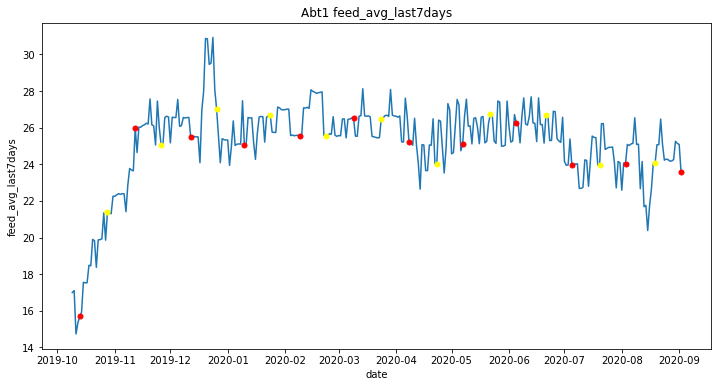

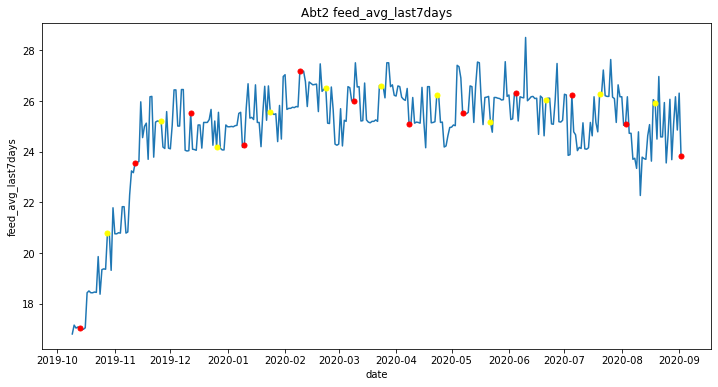

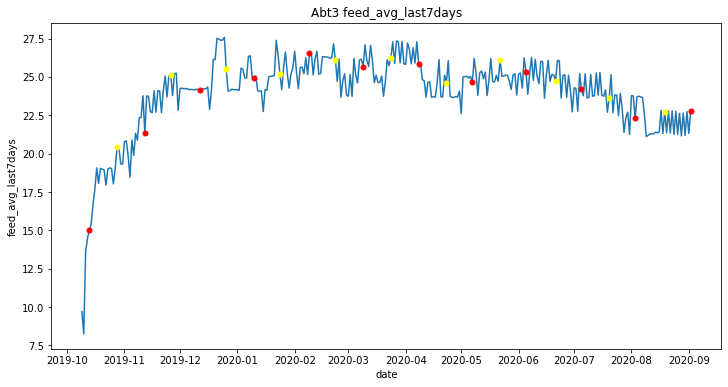

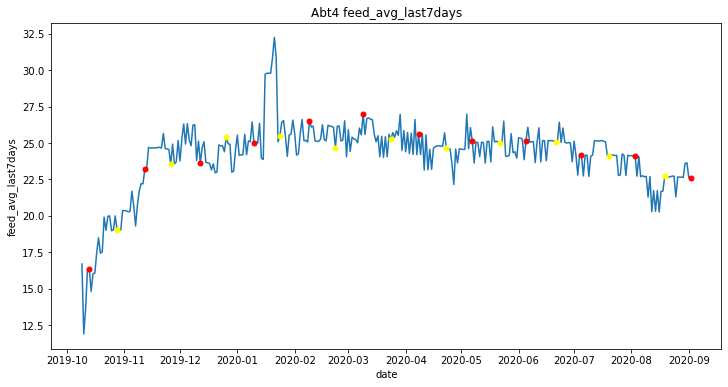

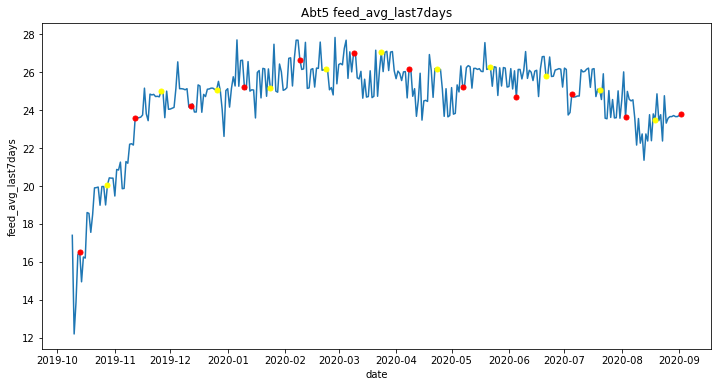

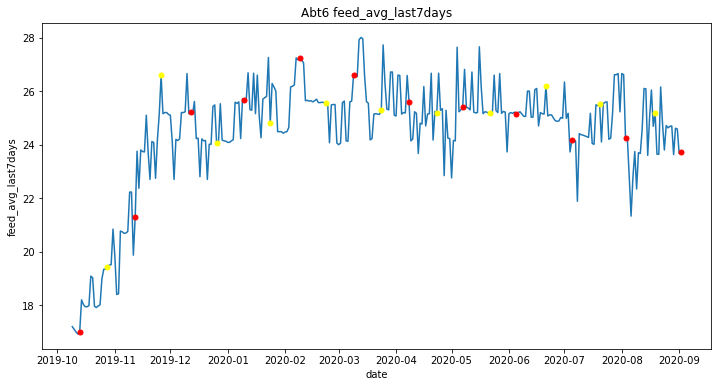

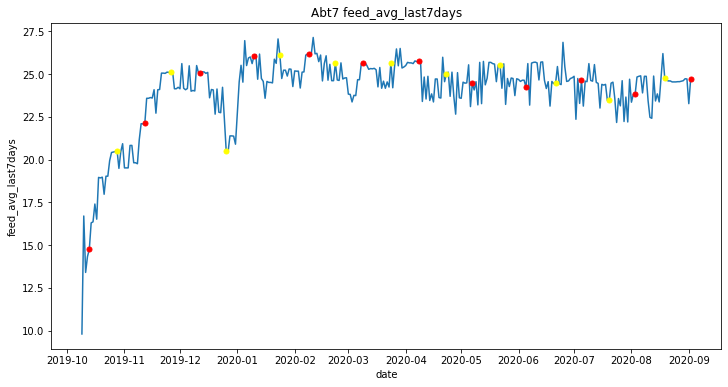

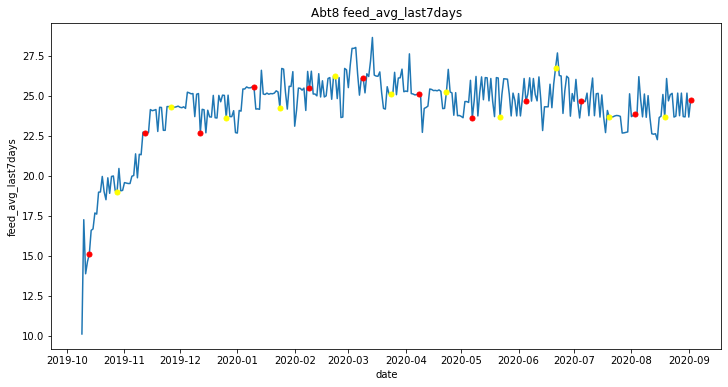

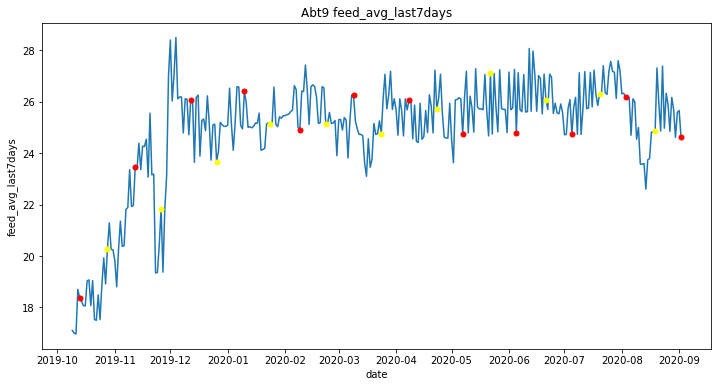

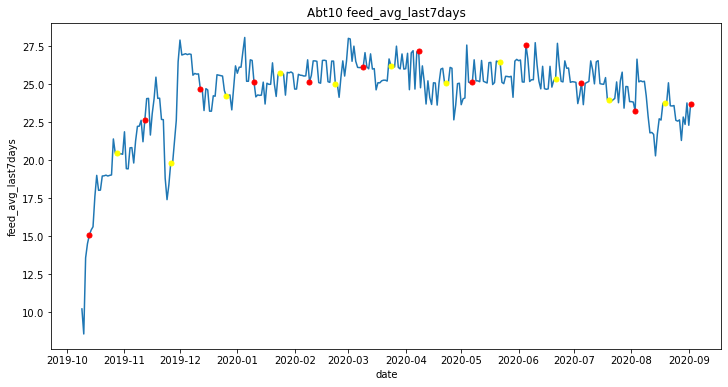

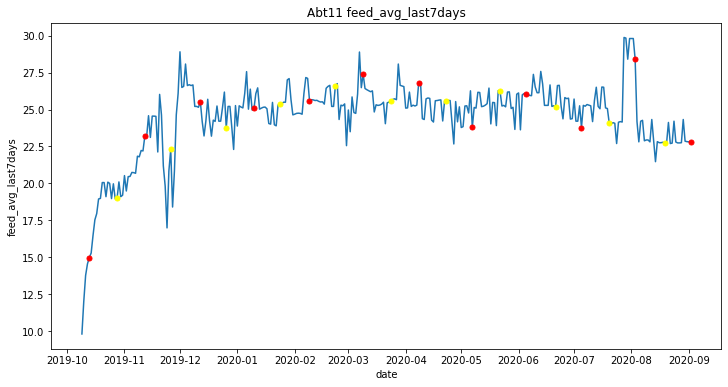

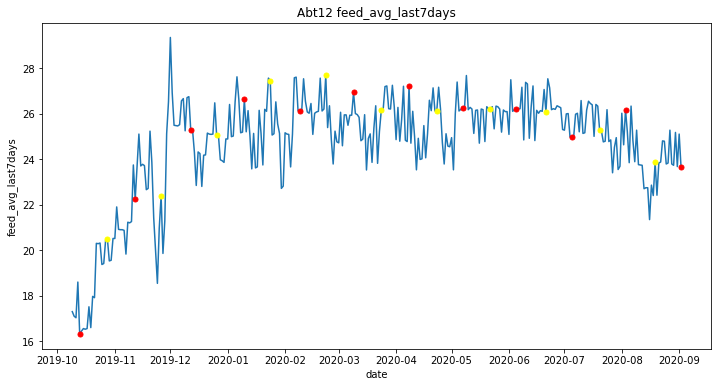

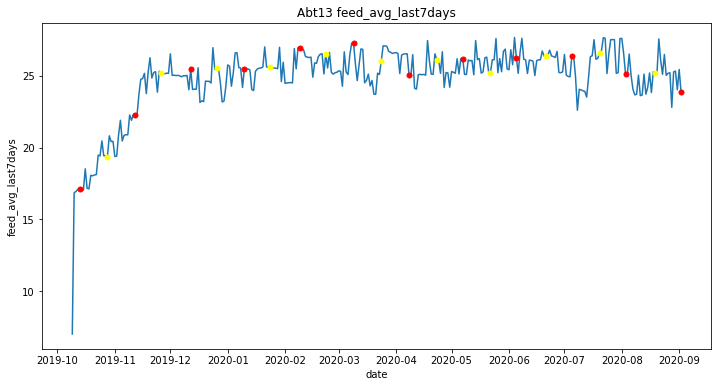

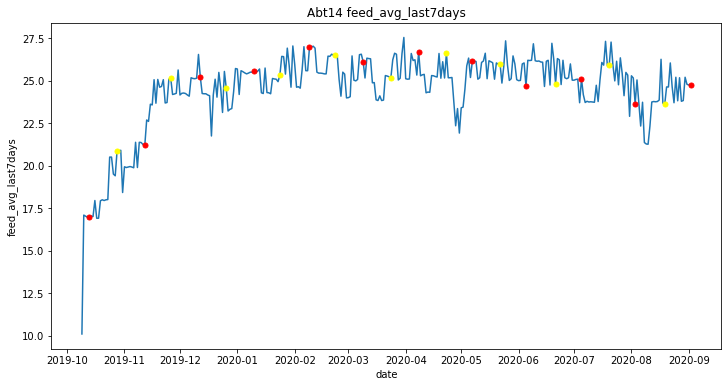

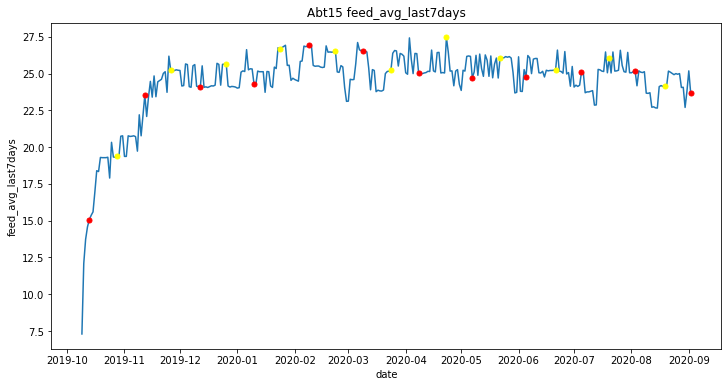

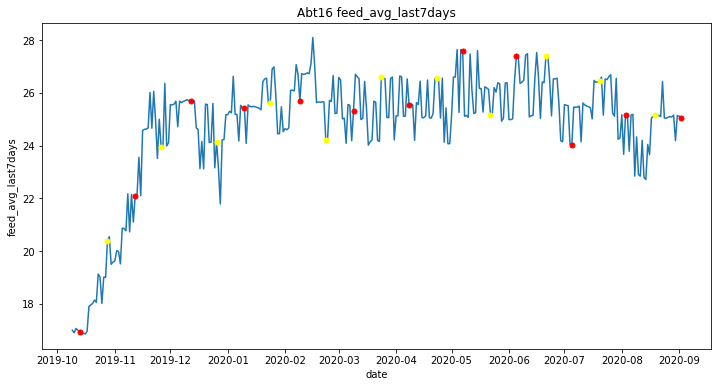

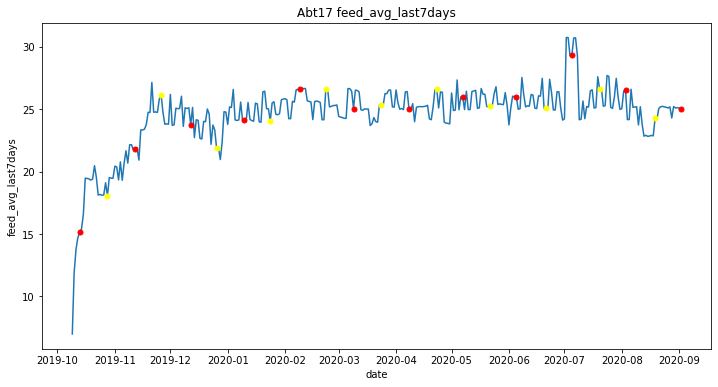

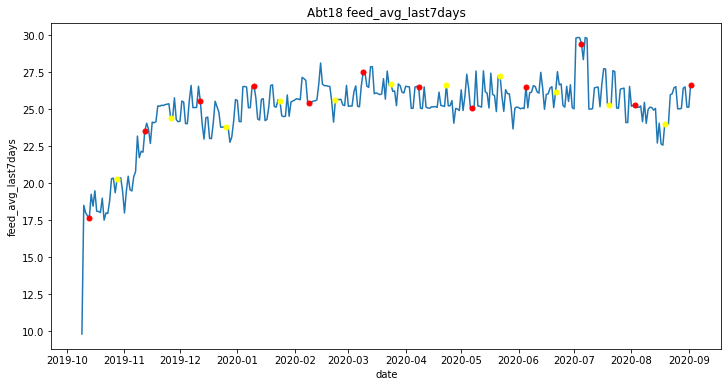

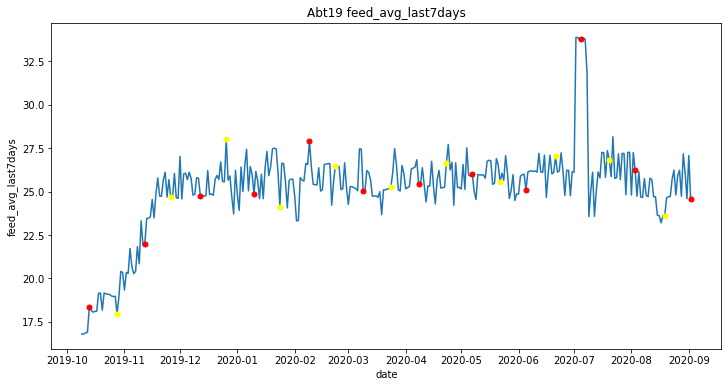

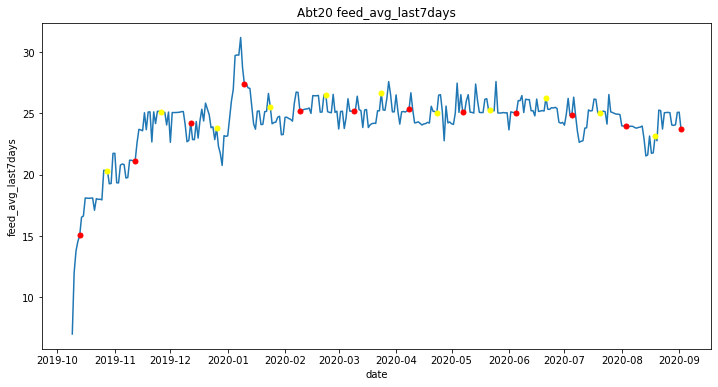

In [23]:
type_ = 'feed_avg_last7days'
df_feed['type_'] = df_feed[type_].astype(float)
for Pen in df_feed['Pen'].unique():
    plt.figure(figsize=(12,6))
    ax = plt.plot()
    df_plt = df_feed[df_feed['Pen']==Pen]
    sns.lineplot(x="date", y=type_, data=df_plt);
    dico_color = {'Full Moon':'r', 'Last Quarter':'blue', 'New Moon':'yellow', 'First Quarter':'green'}
    #for l in df_moon['lunar phase'].unique():
    for l in ['Full Moon','New Moon']:
        for d in df_moon[df_moon['lunar phase']==l]['date'].tolist():
            if d in df_feed['date'].unique():
                plt.plot(d, np.mean(df_plt[df_plt['date']==d][type_].tolist()),
                         color=dico_color[l],marker=".", markersize=10)
    plt.title(Pen+' '+type_)
    plt.savefig(os.path.join(path_, 'MoonPhaseFeed'+Pen+'.png'), dpi=300,format='png',bbox_inches='tight')
    plt.show()